In [1]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Circular Task analysis Assignment"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Antoine Lescarboura & Alexis Lagarde"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Circular Task analysis Assignment

28 November 2025, 18:39:10

by Antoine Lescarboura & Alexis Lagarde

In [2]:
# imports (this is all you need for this assignment - please, do not import anything else)
import numpy as np
import matplotlib.pyplot as plt
import os

# very useful for zoomable plots in Jupyter notebooks
%matplotlib widget

# import pandas as pd # we do not use pandas here

In [3]:
file = './data/001MoDe_R1.csv'
file2 = './data/001MoDe_R1.marker.csv'

with open(file, 'r', encoding='utf-8') as f:
    firstLine = f.readline().strip()


if firstLine:
    data = firstLine.split(';')
    print("Header line information in 'data/001MoDe_R1.csv':")
    for d in data:
        print("  " + d.strip())


Header line information in 'data/001MoDe_R1.csv':
  screenWidth 1104
  screenHeight 661
  cornerX 302
  cornerY 80
  centerX 552
  centerY 330
  externalRadius 250
  internalRadius 170
  borderRadius 1
  cursorRadius 16
  indexOfDifficulty 28.00696429476858
  taskRadius 209.5
  taskTolerance 47
  borderColor java.awt.Color[r=255,g=255,b=255]
  backgroundColor java.awt.Color[r=0,g=0,b=0]
  cursorColorRecord java.awt.Color[r=255,g=0,b=0]
  cursorColorWait java.awt.Color[r=255,g=255,b=0]
  autoStart 3600
  cycleMaxNumber 6
  cycleDuration 20
  software LSL-mouse
  version 1.2.0rc5
  task CircularTarget
  isWithLSL false


In [182]:
SEPARATOR = ',' 

print("Markers in 'data/001MoDe_R1.marker.csv':")

lines_after_date = []
processing_block = False
def check_date_format_manual(s):

    if len(s) < 10:
        return False
    
    if s[4] != '-' or s[7] != '-':
        return False
    
    try:
        if not s[0:4].isdigit(): return False
        if not s[5:7].isdigit(): return False
        if not s[8:10].isdigit(): return False
        return True
    except IndexError:
        return False


def print_aligned_block(lines):
    if not lines:
        return

    split_lines = [line.split(SEPARATOR) for line in lines]

    max_widths = []
    num_cols = max(len(cols) for cols in split_lines) if split_lines else 0

    for col in range(num_cols):
        max_width = 0
        for cols in split_lines:
            if col < len(cols):
                max_width = max(max_width, len(cols[col].strip()))
        max_widths.append(max_width)

    for cols in split_lines:
        padded = []
        for i, col in enumerate(cols):
            content = col.strip()
            padded.append(content.ljust(max_widths[i]))
                 
        print("    " + " , ".join(padded))



try:
    with open(file2, 'r', encoding='utf-8') as f:
        for i in range(3):
            next(f) 
        
        for line in f:
            stripped = line.strip()

            if check_date_format_manual(stripped):
                
                print_aligned_block(lines_after_date)
                lines_after_date = []
                processing_block = True


                parts = stripped.split(SEPARATOR, 1)
                stripped_content = parts[1].strip() if len(parts) > 1 else stripped

                subparts = stripped_content.split(SEPARATOR, 1)
                if len(subparts) == 2:
                    stripped_output = f"{subparts[0].strip()}: {subparts[1].strip()}"
                else:
                    stripped_output = stripped_content

                print(stripped_output)

            elif processing_block:
                lines_after_date.append(stripped)
            
            else:
                print(" " + stripped)

except FileNotFoundError:
    print(f"nothing")
except Exception as e:
    print(f"nothing")

print_aligned_block(lines_after_date)



Markers in 'data/001MoDe_R1.marker.csv':
1616776712325: KeyTyped=32 DoCycleChange
1616776712331: DoCycleChange:DoStartCycleTimedSequence
1616776712333: DoCycleChange:DoRecord RecordDone=0 PauseDone=0 ToDo=6
1616776732336: DoCycleChange:DoPause RecordDone=1 PauseDone=0 ToDo=6
1616776752340: DoCycleChange:DoRecord RecordDone=1 PauseDone=1 ToDo=6
1616776772351: DoCycleChange:DoPause RecordDone=2 PauseDone=1 ToDo=6
1616776792372: DoCycleChange:DoRecord RecordDone=2 PauseDone=2 ToDo=6
1616776812386: DoCycleChange:DoPause RecordDone=3 PauseDone=2 ToDo=6
1616776832390: DoCycleChange:DoRecord RecordDone=3 PauseDone=3 ToDo=6
1616776852404: DoCycleChange:DoPause RecordDone=4 PauseDone=3 ToDo=6
1616776872419: DoCycleChange:DoRecord RecordDone=4 PauseDone=4 ToDo=6
1616776892433: DoCycleChange:DoPause RecordDone=5 PauseDone=4 ToDo=6
1616776898364: KeyTyped=113 WINDOW_CLOSING
1616776898367: 
    Var    , nLaps  , Re     , Te    , error , MT/lap , IDe/lap , Be     , IPe   , 
    unit   , lap    , pix

In [ ]:
data_file = "./data/001MoDe_R1.csv"
marker_file = "./data/001MoDe_R1.marker.csv"

first_data_ts = None
with open(data_file, "r") as f:
    lines = f.readlines()

for line in lines[1:]:
    line = line.strip()
    if not line:
        continue
    parts = line.split(",")
    if len(parts) < 1:
        continue
    try:
        first_data_ts = int(parts[0])
        break
    except:
        continue

if first_data_ts is None:
    raise ValueError("NO timestamp")

def load_segments_from_marker(marker_file):
    segments = []
    start_ts = None
    with open(marker_file, "r", encoding="utf-8") as f:
        lines = f.readlines()
    for line in lines:
        line = line.strip()
        if not line:
            continue
        parts = line.split(",")
        if len(parts) < 3:
            continue
        try:
            ts = int(parts[1])
        except:
            continue
        event = parts[2]
        if "DoCycleChange:DoRecord" in event:
            start_ts = ts
        elif "DoCycleChange:DoPause" in event and start_ts is not None:
            segments.append((start_ts, ts))
            start_ts = None
    return segments

segments = load_segments_from_marker(marker_file)

print("record times (milliseconds since Unix epoch):")
for s, e in segments:
    print(f"{s} to {e} ({(e-s)/1000:.3f} s)")

print("\nrecord times (seconds since the first DoRecord marker):")
for s, e in segments:
    rel_start = (s - first_data_ts) / 1000.0
    rel_end   = (e - first_data_ts) / 1000.0
    duration  = (e - s) / 1000.0
    print(f"{rel_start:8.3f} to {rel_end:8.3f} ({duration:.3f} s)")



record times (milliseconds since Unix epoch):
1616776712333 to 1616776732336 (20.003 s)
1616776752340 to 1616776772351 (20.011 s)
1616776792372 to 1616776812386 (20.014 s)
1616776832390 to 1616776852404 (20.014 s)
1616776872419 to 1616776892433 (20.014 s)

record times (seconds since the first DoRecord marker):
   0.004 to   20.007 (20.003 s)
  40.011 to   60.022 (20.011 s)
  80.043 to  100.057 (20.014 s)
 120.061 to  140.075 (20.014 s)
 160.090 to  180.104 (20.014 s)


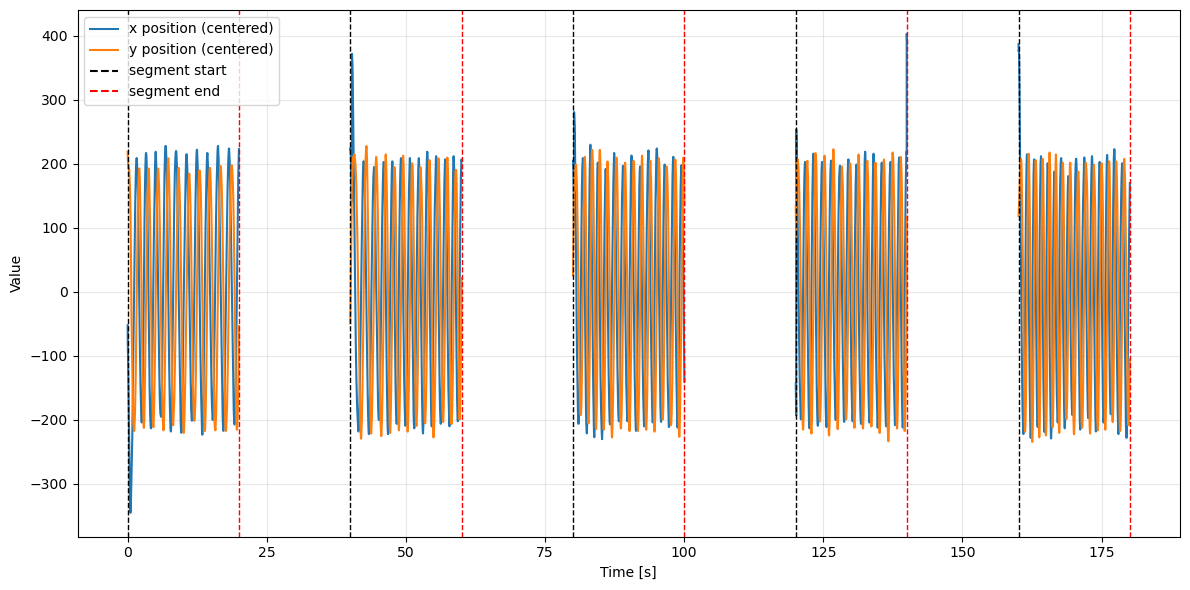

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data_file = "./data/001MoDe_R1.csv"
marker_file = "./data/001MoDe_R1.marker.csv"

mouseX_list = []
mouseY_list = []
mouseInTarget_list = []

with open(data_file, 'r') as f:
    lines = f.readlines()
    for i in range(1, len(lines)):
        line = lines[i].strip()
        if not line:
            continue
        if line == "0,0,0,0":
            continue
        parts = line.split(',')
        if len(parts) >= 4:
            try:
                mx = float(parts[1])
                my = float(parts[2])
                mit = float(parts[3])
                mouseX_list.append(mx)
                mouseY_list.append(my)
                mouseInTarget_list.append(mit)
            except:
                continue


mouseX = np.array(mouseX_list)
mouseY = np.array(mouseY_list)
mouseInTarget = np.array(mouseInTarget_list)

CENTER_X = np.mean(mouseX)
CENTER_Y = np.mean(mouseY)
mouseX_centered = mouseX - CENTER_X
mouseY_centered = mouseY - CENTER_Y

def load_segments_from_marker(file_marker):
    segments = []
    with open(file_marker, 'r', encoding='utf-8') as f:
        start_ts = None
        for line in f:
            line = line.strip()
            if "DoCycleChange:DoRecord" in line:
                try:
                    start_ts = int(line.split(',')[1])
                except:
                    start_ts = None
            elif "DoCycleChange:DoPause" in line and start_ts is not None:
                try:
                    end_ts = int(line.split(',')[1])
                    segments.append({'start_ts': start_ts, 'end_ts': end_ts})
                except:
                    pass
                start_ts = None
    return segments

segments = load_segments_from_marker(marker_file)
first_ts = segments[0]['start_ts']
N_total = len(mouseX)
N_segments = len(segments)
pts_per_segment = N_total // N_segments

segments_table = []

for i, seg in enumerate(segments):
    start_idx = i * pts_per_segment
    end_idx = start_idx + pts_per_segment

    segment_dict = {
        "start_ts": seg['start_ts'],
        "end_ts": seg['end_ts'],
        "x_data": mouseX_centered[start_idx:end_idx],
        "y_data": mouseY_centered[start_idx:end_idx],
        "mouseInTarget": mouseInTarget[start_idx:end_idx],
        "t_rel": (np.linspace(seg['start_ts'], seg['end_ts'], end_idx - start_idx) - first_ts)/1000.0
    }
    segments_table.append(segment_dict)

plt.figure(figsize=(12, 6))

first_ts = segments[0]['start_ts']

for i, seg in enumerate(segments):
    n_points = len(mouseX) // len(segments)
    start_idx = i * n_points
    end_idx = start_idx + n_points
    
    x_seg = mouseX_centered[start_idx:end_idx]
    y_seg = mouseY_centered[start_idx:end_idx]
    
    t_rel_global = (np.linspace(seg['start_ts'], seg['end_ts'], len(x_seg)) - first_ts) / 1000.0
    
    plt.plot(t_rel_global, x_seg, color="tab:blue", linewidth=1.5, label="x position (centered)" if i==0 else "")
    plt.plot(t_rel_global, y_seg, color="tab:orange", linewidth=1.5, label="y position (centered)" if i==0 else "")

    start_rel = (seg['start_ts'] - first_ts) / 1000.0
    end_rel   = (seg['end_ts']   - first_ts) / 1000.0

    plt.axvline(x=start_rel, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=end_rel,   color="red",   linestyle="--", linewidth=1)


plt.plot([], [], color="black", linestyle="--", label="segment start")
plt.plot([], [], color="red", linestyle="--", label="segment end")

plt.xlabel('Time [s]')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


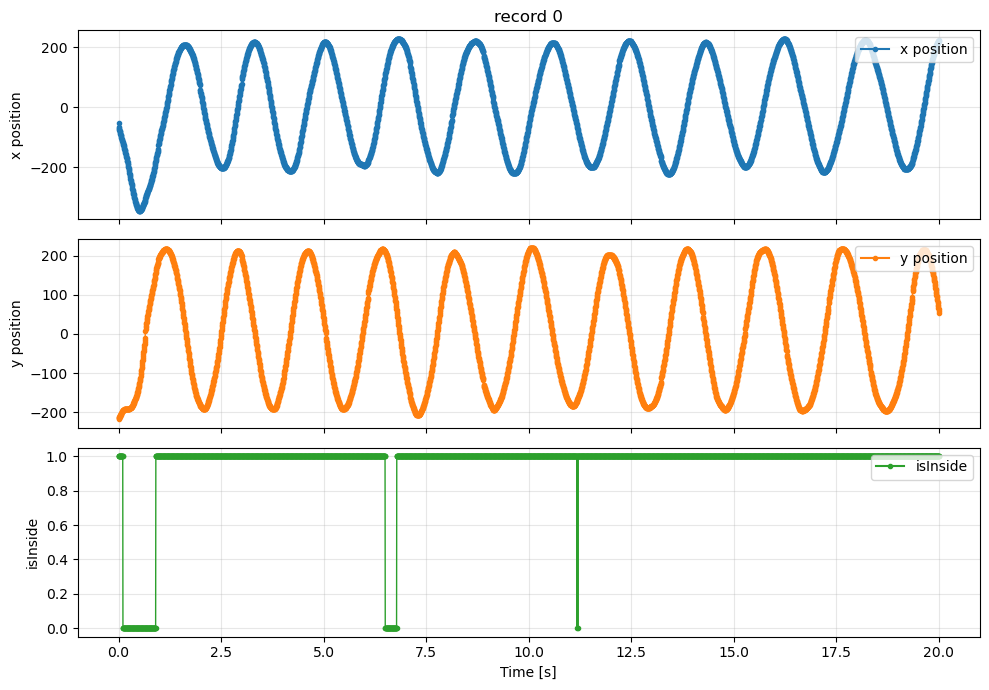

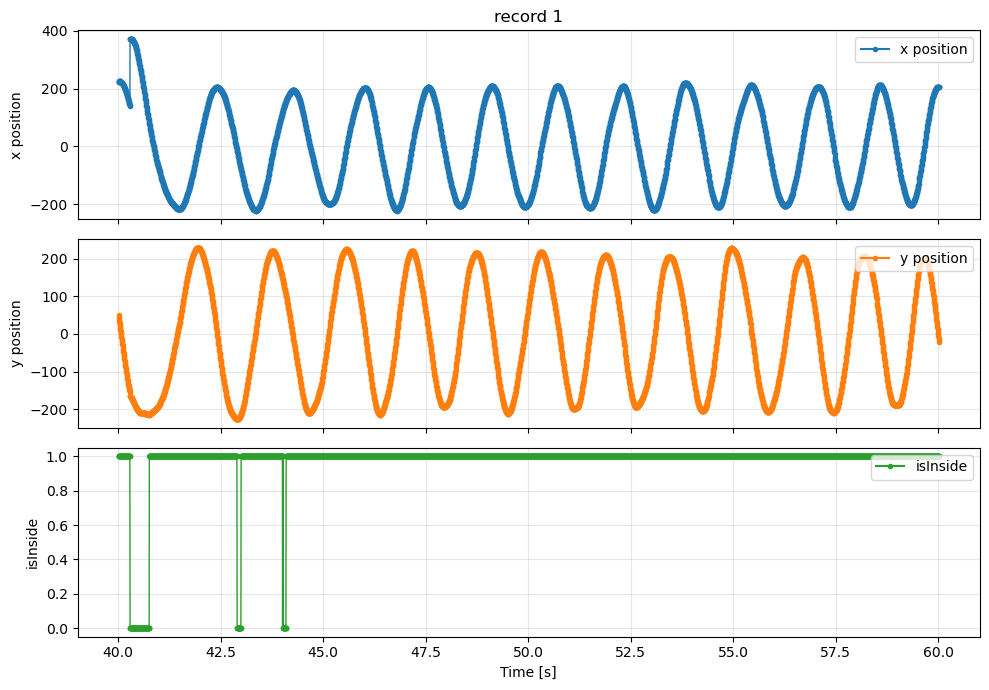

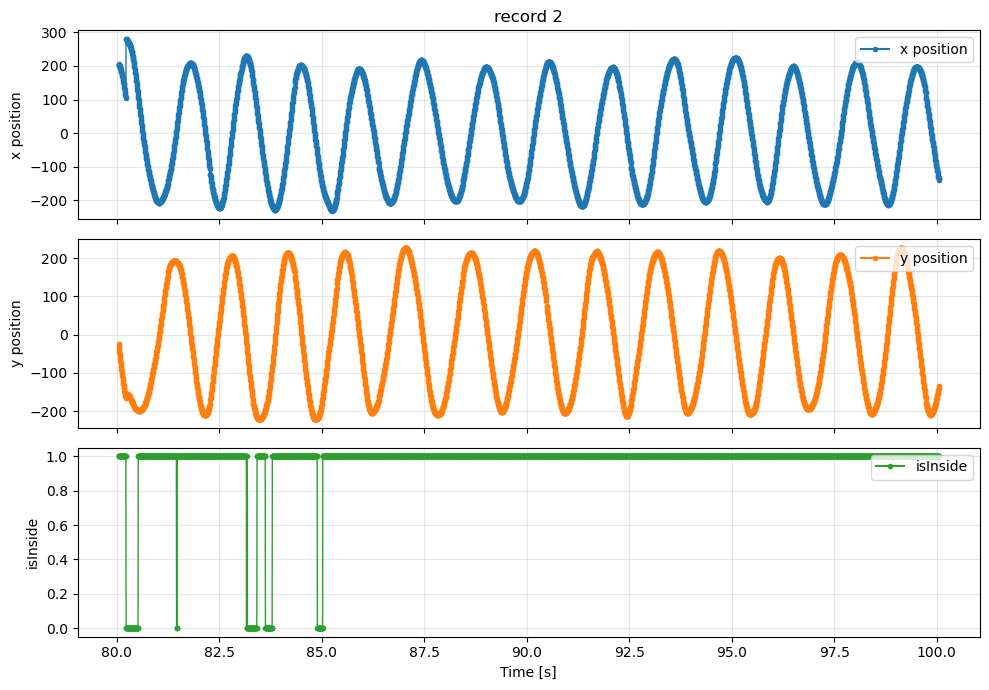

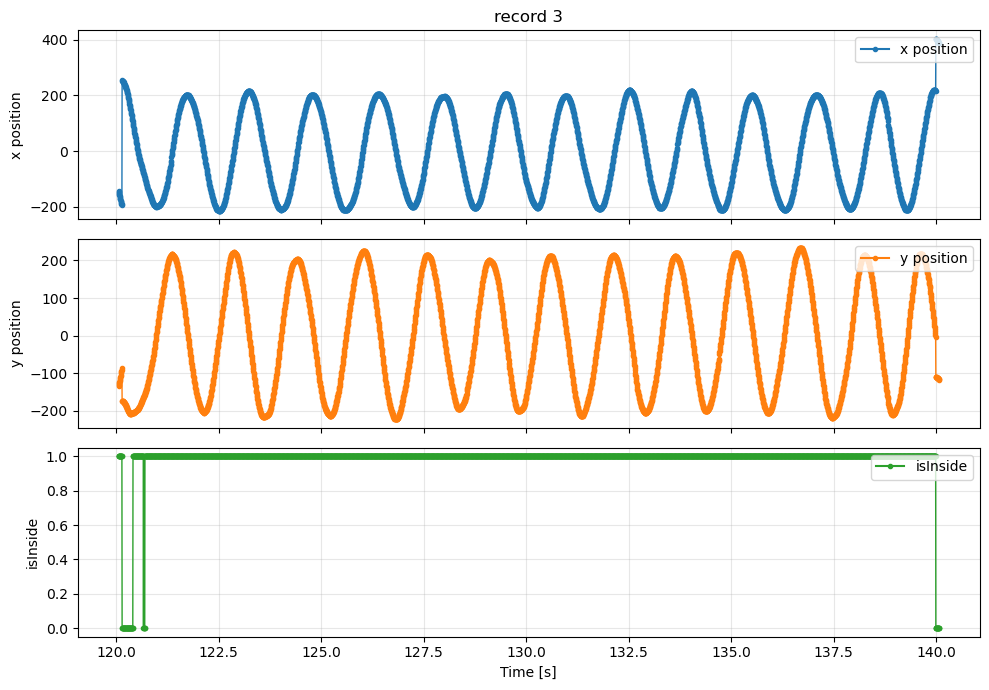

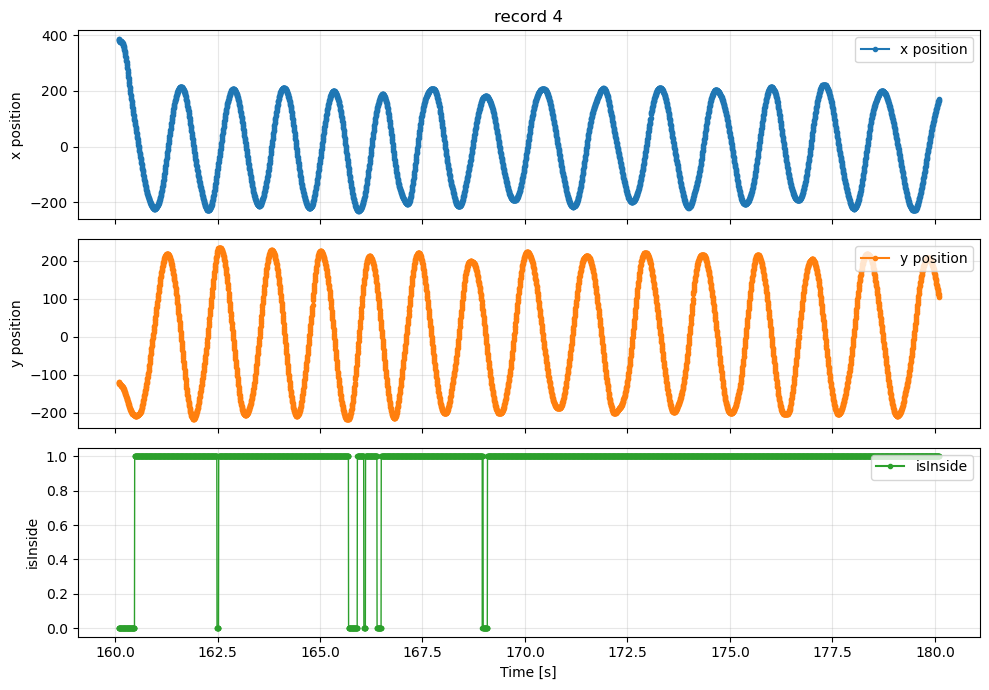

In [ ]:
import matplotlib.pyplot as plt


for i, seg in enumerate(segments_table, start=1):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

    ax1.plot(seg['t_rel'], seg['x_data'], linestyle='-', marker=".", color='tab:blue', linewidth=1)
    ax2.plot(seg['t_rel'], -seg['y_data'], linestyle='-', marker=".", color='tab:orange', linewidth=1)
    ax3.plot(seg['t_rel'], seg['mouseInTarget'], linestyle='-', marker=".", color='tab:green', linewidth=1.0)

    ax1.set_ylabel("x")
    ax1.set_title(f"record {i-1}")
    ax1.grid(True, alpha=0.3)
    ax1.plot([], [], color="tab:blue", label="x position", linestyle='-', marker=".")
    ax1.legend(loc="upper right")

    ax2.set_ylabel("y")
    ax2.grid(True, alpha=0.3)
    ax2.plot([], [], color="tab:orange", label="y position", linestyle='-', marker=".")
    ax2.legend(loc="upper right")

    ax3.set_xlabel("Time [s]")
    ax3.set_ylabel("isInside")
    ax3.grid(True, alpha=0.3)
    ax3.plot([], [], color="tab:green", label="isInside", linestyle='-', marker=".")
    ax3.legend(loc="upper right")

    plt.tight_layout()
    plt.show()


In [31]:
import numpy as np

# ---- CONSTANTS ----
K_FITTS = 4.133
TARGET_SLOPES = [1.95, 0.73, 0.90, 0.79, 0.93]

SEGMENT_WINDOWS = [
    (0.004, 20.007),
    (40.011, 60.022),
    (80.043, 100.057),
    (120.061, 140.075),
    (160.090, 180.104)
]

ABS_START_TIME = 1616776712.333
INPUT_FILE = "./data/001MoDe_R1.csv"


# ---- READ FILE ----
def load_metadata_and_samples(path):
    metadata = {}
    header_end = 0

    with open(path, "r") as f:
        lines = f.readlines()

    for idx, raw in enumerate(lines):
        line = raw.strip()

        if idx == 0:
            items = line.split(";")
            for entry in items:
                entry = entry.strip()
                if not entry:
                    continue

                if " " in entry:
                    k, v = entry.rsplit(" ", 1)
                    k = k.strip()
                    v = v.strip()

                    try:
                        if k in [
                            "screenWidth", "screenHeight",
                            "cornerX", "cornerY",
                            "centerX", "centerY",
                            "externalRadius", "internalRadius",
                            "cycleDuration",
                            "taskRadius", "taskTolerance",
                            "indexOfDifficulty"
                        ]:
                            metadata[k] = float(v)
                        else:
                            metadata[k] = v
                    except ValueError:
                        metadata[k] = v

        elif "timestamp,mouseX,mouseY,mouseInTarget" in line:
            header_end = idx + 1
            break

    arr = np.loadtxt(path, delimiter=",", skiprows=header_end)

    if arr[0, 0] > 1e12:
        arr[:, 0] /= 1000.0

    return metadata, arr


# ---- LAPS COMPUTATION ----
def compute_lap_fraction(px, py, cx, cy):
    dx = px - cx
    dy = py - cy
    ang = np.arctan2(dy, dx)

    ang_unwrapped = np.unwrap(ang)
    delta = ang_unwrapped[-1] - ang_unwrapped[0]

    return delta / (2 * np.pi)


# ---- MAIN PER-CYCLE ANALYSIS ----
def evaluate_cycle(segment, meta, slope):
    t = segment[:, 0]
    xs = segment[:, 1]
    ys = segment[:, 2]
    radius_vec = segment[:, 4]

    npts = len(xs)
    r_ext = meta["externalRadius"]
    r_int = meta["internalRadius"]

    if npts > 1:
        cycle_dur = t[-1] - t[0]
        dt = np.diff(t, prepend=t[0])
    else:
        cycle_dur = 0
        dt = np.array([0])

    avg_radius = np.mean(radius_vec)
    std_radius = np.std(radius_vec)
    T_eff = K_FITTS * std_radius

    out_mask = (radius_vec < r_int) | (radius_vec > r_ext)
    time_out = np.sum(dt[out_mask])
    pct_err = (time_out / cycle_dur) * 100 if cycle_dur > 0 else 0

    laps = compute_lap_fraction(xs, ys, meta["centerX"], meta["centerY"])

    if abs(laps) > 0 and T_eff > 0:
        MT = cycle_dur / abs(laps)
        ID_eff = np.log2((2 * np.pi * avg_radius) / T_eff)
        throughput = ID_eff / MT
    else:
        MT = np.nan
        ID_eff = np.nan
        throughput = 0

    return {
        "laps": laps,
        "Re": avg_radius,
        "Te": T_eff,
        "err": pct_err,
        "MT": MT,
        "IDe": ID_eff,
        "slope": slope,
        "TP": throughput,
    }


# ---- GLOBAL PROCESS ----
def run_full_analysis(file_path, slopes, windows):
    meta, raw = load_metadata_and_samples(file_path)

    cx, cy = meta["centerX"], meta["centerY"]
    radii = np.sqrt((raw[:, 1] - cx)**2 + (raw[:, 2] - cy)**2)
    raw_with_r = np.hstack((raw, radii[:, None]))

    results = []

    for idx, (w_start, w_end) in enumerate(windows):
        abs_start = ABS_START_TIME + w_start
        abs_end = ABS_START_TIME + w_end

        subset = raw_with_r[(raw_with_r[:, 0] >= abs_start) & (raw_with_r[:, 0] <= abs_end)]

        if len(subset) > 0:
            metrics = evaluate_cycle(subset, meta, slopes[idx])
        else:
            metrics = {k: np.nan for k in ["laps", "Re", "Te", "err", "MT", "IDe", "slope", "TP"]}

        metrics["label"] = f"Rec{idx+1:03d}"
        results.append(metrics)

    output = []
    header = "   " + "Var , nLaps ,     Re ,     Te ,   error , MT/lap , IDe/lap ,     Be ,     IPe ,"
    units =  "  ""unit ,   lap ,  pixel ,  pixel ,       % ,  s/lap , bit/lap , double ,   bit/s ,"
    output.append(header)
    output.append(units)

    th_Re = meta.get("taskRadius", np.nan)
    th_Te = meta.get("taskTolerance", np.nan)
    th_err = 3.88
    th_slope = 1.00

    theory = (
        f"Theory ,  1.00 , {th_Re:6.2f} , {th_Te:6.2f} , {th_err:7.2f} ,        ,         ,"
        f" {th_slope:6.2f} ,         ,"
    )
    output.append(theory)

    for r in results:
        nl = -r["laps"]

        line = (
            f"{r[ 'label']} , {-nl:5.2f} , {r['Re']:6.2f} , {r['Te']:6.2f} , {r['err']:7.2f} , "
            f"{r['MT']:6.2f} , {r['IDe']:7.2f} , {r['slope']:6.2f} , {r['TP']:7.2f} ,"
        )

        line = line.replace("   nan", "      -").replace("  nan", "     -")
        output.append(line)

    return "\n".join(output)


# ---- RUN SCRIPT ----
table = run_full_analysis(INPUT_FILE, TARGET_SLOPES, SEGMENT_WINDOWS)
print("recomputed statistics for all records:")
print(table)


recomputed statistics for all records:
   Var , nLaps ,     Re ,     Te ,   error , MT/lap , IDe/lap ,     Be ,     IPe ,
  unit ,   lap ,  pixel ,  pixel ,       % ,  s/lap , bit/lap , double ,   bit/s ,
Theory ,  1.00 , 209.50 ,  47.00 ,    3.88 ,        ,         ,   1.00 ,         ,
Rec001 , 10.84 , 213.86 ,  91.79 ,    3.33 ,   1.84 ,    3.87 ,   1.95 ,    2.10 ,
Rec002 , 12.09 , 212.99 ,  98.14 ,    2.49 ,   1.62 ,    3.77 ,   0.73 ,    2.33 ,
Rec003 , 13.35 , 210.66 ,  60.61 ,    2.14 ,   1.47 ,    4.45 ,   0.90 ,    3.02 ,
Rec004 , 12.91 , 210.45 ,  51.96 ,    1.33 ,   1.51 ,    4.67 ,   0.79 ,    3.10 ,
Rec005 , 14.88 , 214.14 , 104.52 ,    3.56 ,   1.34 ,    3.69 ,   0.93 ,    2.75 ,
